In [33]:
# First install Kaggle and opendatasets to download from Kaggle since file too big
!pip install kaggle
!pip install opendatasets
import opendatasets as od
import pandas as pd
from datetime import datetime

# You will need Kaggle username and key, use mine:
# ppabloo
# 
od.download("https://www.kaggle.com/datasets/kazanova/sentiment140/")

#Read the dataset
df = pd.read_csv('./sentiment140/training.1600000.processed.noemoticon.csv', 
                 names=['score', 'id', 'date', 'col4', 'author', 'tweet'])

Skipping, found downloaded files in ".\sentiment140" (use force=True to force download)


In [16]:
print(df.head(10))

   col1        col2                          col3      col4             col5  \
0     0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1     0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2     0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3     0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4     0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
5     0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
6     0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY          mybirch   
7     0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY             coZZ   
8     0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY  2Hood4Hollywood   
9     0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY          mimismo   

                                                col6  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is ups

In [20]:
column_names = df.columns

# Print the column names
print(column_names)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6'], dtype='object')


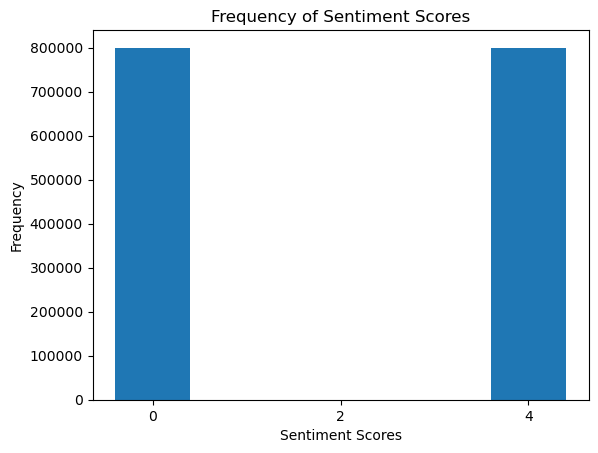

In [19]:
import matplotlib.pyplot as plt
filtered_df = df[df['col1'].isin([0, 2, 4])]

# Count the frequency of each value
value_counts = filtered_df['col1'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment Scores')
plt.xticks([0, 2, 4])

# Show the plot
plt.show()

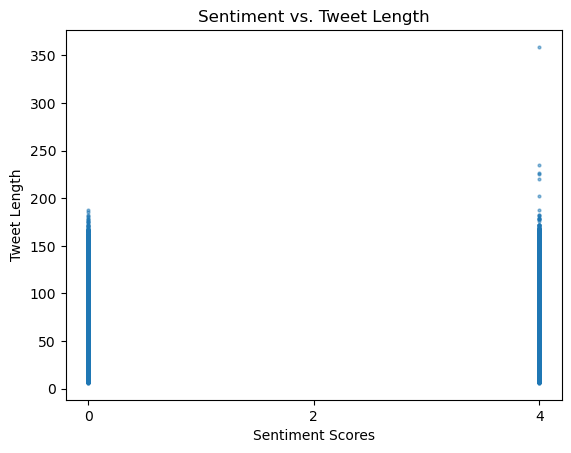

In [30]:
filtered_df = df[df['score'].isin([0, 2, 4])]

# Calculate the length of each tweet and add it as a new column
filtered_df['tweet_length'] = filtered_df['tweet'].apply(len)

# Create a scatter plot
plt.scatter(filtered_df['score'], filtered_df['tweet_length'], alpha=0.5, s=4)

# Set labels and title
plt.xlabel('Sentiment Scores')
plt.ylabel('Tweet Length')
plt.title('Sentiment vs. Tweet Length')
plt.xticks([0, 2, 4])

# Show the plot
plt.show()